# R ML Crash Course_Part 4: ML Algorithm & Evaluation

## Full Day Workshop for user learn Data Science with R
### 2018  Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose


## Which Algorithms To Spot-Check
You can guess at what algorithms might do well on your dataset, and this can be a good starting
point. I recommend trying a mixture of algorithms and see what is good at picking out the
structure in your data.

- Try a mixture of algorithm representations (e.g. instance-based methods and trees).
- Try a mixture of learning algorithms (e.g. different algorithms for learning the same type
of representation).
- Try a mixture of modeling types (e.g. linear and nonlinear functions or parametric and
nonparametric).

### In the following, we will use two approach on each algo to showcase library (caret) power

## Linear Algorithms
- As such they have a high bias but are often fast to train. The final models are also often easy (or
easier) to interpret, making them desirable as final models. 
- If the results are suitably accurate,
you may not need to move onto using nonlinear methods.
- The lm() function is in the stats package and creates a linear regression model using ordinary
least squares

In [2]:
# load the package
library(mlbench)
# load data
data(BostonHousing)
# fit model
fit <- lm(medv~., BostonHousing)
# summarize the fit
print(fit)
# make predictions
predictions <- predict(fit, BostonHousing)
# summarize accuracy
mse <- mean((BostonHousing$medv - predictions)^2)
print(mse)


Call:
lm(formula = medv ~ ., data = BostonHousing)

Coefficients:
(Intercept)         crim           zn        indus        chas1          nox  
  3.646e+01   -1.080e-01    4.642e-02    2.056e-02    2.687e+00   -1.777e+01  
         rm          age          dis          rad          tax      ptratio  
  3.810e+00    6.922e-04   -1.476e+00    3.060e-01   -1.233e-02   -9.527e-01  
          b        lstat  
  9.312e-03   -5.248e-01  

[1] 21.89483


crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] 506  14

crim        zn     indus      chas       nox        rm       age       dis 
"numeric" "numeric" "numeric"  "factor" "numeric" "numeric" "numeric" "numeric" 
      rad       tax   ptratio         b     lstat      medv 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric"

ERROR: Error in hist.default(BostonHousing[, i], main = names(BostonHousing)[i]): 'x' must be numeric


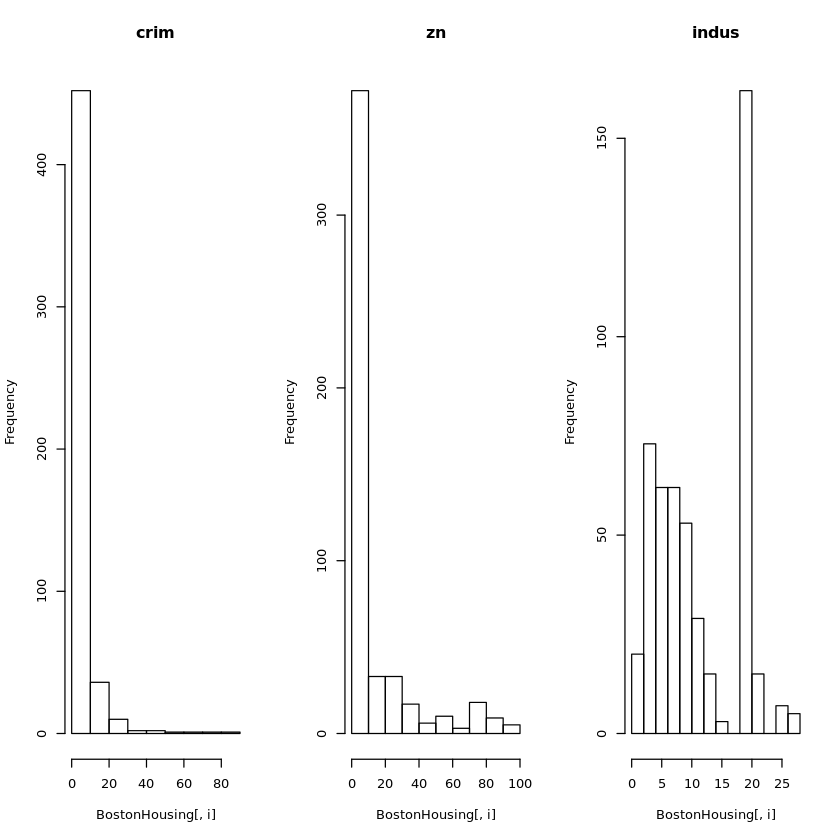

In [25]:
head(BostonHousing)
dim(BostonHousing)
sapply(BostonHousing, class)
par(mfrow=c(1,3))
for(i in 1:4) {
hist(BostonHousing[,i], main=names(BostonHousing)[i])
}
summary(BostonHousing)

In [14]:
install.packages('corrplot')

Installing package into ‘/user-home/_global_/R’
(as ‘lib’ is unspecified)


In [21]:
BH= subset(BostonHousing, select = -c(chas) )

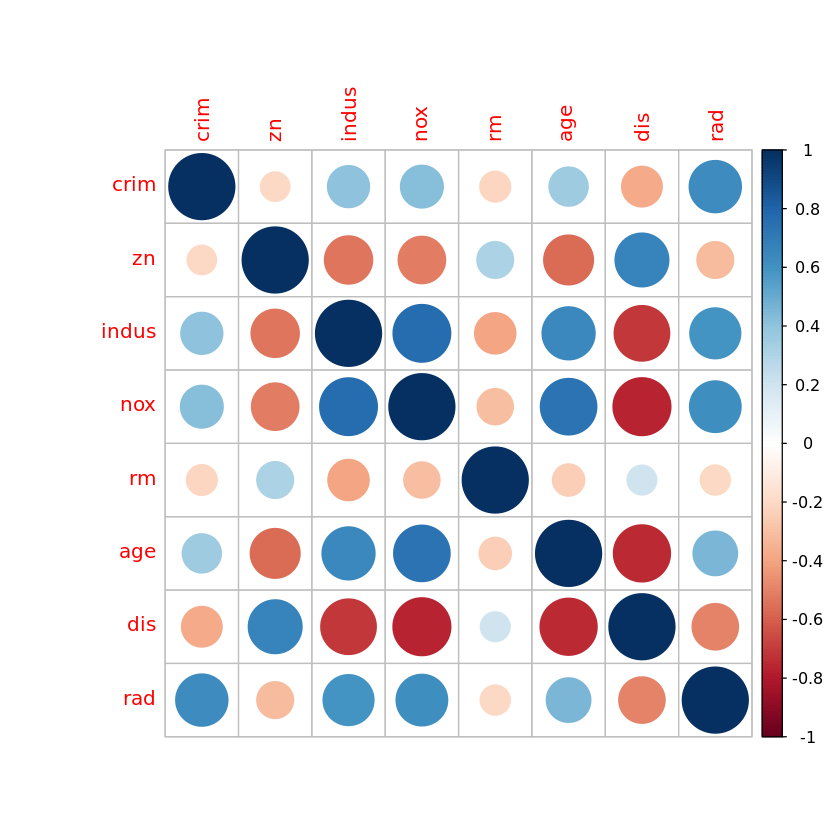

In [22]:
library(corrplot)
# calculate correlations
correlations <- cor(BH[,1:8])
# create correlation plot
corrplot(correlations, method="circle")

In [23]:
# load packages
library(caret)
library(mlbench)
# load dataset
data(BostonHousing)
# train
set.seed(7)
trainControl <- trainControl(method="cv", number=5)
fit.lm <- train(medv~., data=BostonHousing, method="lm", metric="RMSE",
preProcess=c("center", "scale"), trControl=trainControl)
# summarize fit
print(fit.lm)

Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:SparkR’:

    histogram

Loading required package: ggplot2

Attaching package: ‘caret’

The following object is masked from ‘package:httr’:

    progress



Linear Regression 

506 samples
 13 predictor

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 405, 405, 403, 405, 406 
Resampling results:

  RMSE      Rsquared 
  4.822048  0.7322594

Tuning parameter 'intercept' was held constant at a value of TRUE
 


# Logistic Regression
- The glm() function is in the stats package and creates a generalized linear model for regression
or classification. 
- It can be configured to perform a logistic regression suitable for binary
classification problems.

In [26]:
# load the package
library(mlbench)
# Load the dataset
data(PimaIndiansDiabetes)
# fit model
fit <- glm(diabetes~., data=PimaIndiansDiabetes, family=binomial(link='logit'))
# summarize the fit
print(fit)
# make predictions
probabilities <- predict(fit, PimaIndiansDiabetes[,1:8], type='response')
predictions <- ifelse(probabilities > 0.5,'pos','neg')
# summarize accuracy
table(predictions, PimaIndiansDiabetes$diabetes)


Call:  glm(formula = diabetes ~ ., family = binomial(link = "logit"), 
    data = PimaIndiansDiabetes)

Coefficients:
(Intercept)     pregnant      glucose     pressure      triceps      insulin  
  -8.404696     0.123182     0.035164    -0.013296     0.000619    -0.001192  
       mass     pedigree          age  
   0.089701     0.945180     0.014869  

Degrees of Freedom: 767 Total (i.e. Null);  759 Residual
Null Deviance:	    993.5 
Residual Deviance: 723.4 	AIC: 741.4


           
predictions neg pos
        neg 445 112
        pos  55 156

In [29]:
head(PimaIndiansDiabetes, n=3)
sapply(PimaIndiansDiabetes, class)

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
6,148,72,35,0,33.6,0.627,50,pos
1,85,66,29,0,26.6,0.351,31,neg
8,183,64,0,0,23.3,0.672,32,pos


pregnant   glucose  pressure   triceps   insulin      mass  pedigree       age 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
 diabetes 
 "factor"

In [30]:
# load packages
library(caret)
library(mlbench)
# Load the dataset
data(PimaIndiansDiabetes)
# train
set.seed(7)
trainControl <- trainControl(method="cv", number=5)
fit.glm <- train(diabetes~., data=PimaIndiansDiabetes, method="glm", metric="Accuracy",
preProcess=c("center", "scale"), trControl=trainControl)
# summarize fit
print(fit.glm)

Generalized Linear Model 

768 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 614, 614, 615, 615, 614 
Resampling results:

  Accuracy   Kappa    
  0.7695442  0.4656824

 


# Linear Discriminant Analysis
- The lda() function is in the MASS package and creates a linear model of a classification problem.

In [31]:
# load the packages
library(MASS)
library(mlbench)
# Load the dataset
data(PimaIndiansDiabetes)
# fit model
fit <- lda(diabetes~., data=PimaIndiansDiabetes)
# summarize the fit
print(fit)
# make predictions
predictions <- predict(fit, PimaIndiansDiabetes[,1:8])$class
# summarize accuracy
table(predictions, PimaIndiansDiabetes$diabetes)


Attaching package: ‘MASS’

The following object is masked from ‘package:SparkR’:

    select



Call:
lda(diabetes ~ ., data = PimaIndiansDiabetes)

Prior probabilities of groups:
      neg       pos 
0.6510417 0.3489583 

Group means:
    pregnant  glucose pressure  triceps  insulin     mass pedigree      age
neg 3.298000 109.9800 68.18400 19.66400  68.7920 30.30420 0.429734 31.19000
pos 4.865672 141.2575 70.82463 22.16418 100.3358 35.14254 0.550500 37.06716

Coefficients of linear discriminants:
                   LD1
pregnant  0.0938638298
glucose   0.0269863520
pressure -0.0106293929
triceps   0.0007043468
insulin  -0.0008229296
mass      0.0603702056
pedigree  0.6711517147
age       0.0119490869


           
predictions neg pos
        neg 446 112
        pos  54 156

In [32]:
# load packages
library(caret)
library(mlbench)
# Load the dataset
data(PimaIndiansDiabetes)
# train
set.seed(7)
trainControl <- trainControl(method="cv", number=5)
fit.lda <- train(diabetes~., data=PimaIndiansDiabetes, method="lda", metric="Accuracy",
preProcess=c("center", "scale"), trControl=trainControl)
# summarize fit
print(fit.lda)

Linear Discriminant Analysis 

768 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 614, 614, 615, 615, 614 
Resampling results:

  Accuracy   Kappa    
  0.7695527  0.4665998

 


# Regularized Regression
- The glmnet() function is in the glmnet package and can be used for classification or regression.


In [37]:
install.packages('glmnet')

Installing package into ‘/user-home/_global_/R’
(as ‘lib’ is unspecified)


## Classification = Bimodal

In [38]:
# load the package
library(glmnet)
library(mlbench)
# load data
data(PimaIndiansDiabetes)
x <- as.matrix(PimaIndiansDiabetes[,1:8])
y <- as.matrix(PimaIndiansDiabetes[,9])
# fit model
fit <- glmnet(x, y, family="binomial", alpha=0.5, lambda=0.001)
# summarize the fit
print(fit)
# make predictions
predictions <- predict(fit, x, type="class")
# summarize accuracy
table(predictions, PimaIndiansDiabetes$diabetes)

Loading required package: Matrix
Loading required package: foreach

Attaching package: ‘foreach’

The following object is masked from ‘package:SparkR’:

    when

Loaded glmnet 2.0-13




Call:  glmnet(x = x, y = y, family = "binomial", alpha = 0.5, lambda = 0.001) 

     Df   %Dev Lambda
[1,]  8 0.2718  0.001


           
predictions neg pos
        neg 446 112
        pos  54 156

## Regression = Gaussian

In [39]:
# load data
data(BostonHousing)
BostonHousing$chas <- as.numeric(as.character(BostonHousing$chas))
x <- as.matrix(BostonHousing[,1:13])
y <- as.matrix(BostonHousing[,14])
# fit model
fit <- glmnet(x, y, family="gaussian", alpha=0.5, lambda=0.001)
# summarize the fit
print(fit)
# make predictions
predictions <- predict(fit, x, type="link")
# summarize accuracy
mse <- mean((y - predictions)^2)
print(mse)


Call:  glmnet(x = x, y = y, family = "gaussian", alpha = 0.5, lambda = 0.001) 

     Df   %Dev Lambda
[1,] 13 0.7406  0.001
[1] 21.89497


## Regularization: Lasso, Ridge & Elastic Net
- It can also be configured to perform three important types of regularization: lasso, ridge
and elastic net 
- by configuring the alpha parameter to 1, 0 or in [0,1] respectively. 
- The glmnet
implementation can be used in caret for classication as follows:

In [40]:
# load packages
library(caret)
library(mlbench)
library(glmnet)
# Load the dataset
data(PimaIndiansDiabetes)
# train
set.seed(7)
trainControl <- trainControl(method="cv", number=5)
fit.glmnet <- train(diabetes~., data=PimaIndiansDiabetes, method="glmnet",
metric="Accuracy", preProcess=c("center", "scale"), trControl=trainControl)
# summarize fit
print(fit.glmnet)

glmnet 

768 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 614, 614, 615, 615, 614 
Resampling results across tuning parameters:

  alpha  lambda        Accuracy   Kappa    
  0.10   0.0004447834  0.7708514  0.4691039
  0.10   0.0044478343  0.7695442  0.4656452
  0.10   0.0444783425  0.7682285  0.4550876
  0.55   0.0004447834  0.7708514  0.4691039
  0.55   0.0044478343  0.7721416  0.4716536
  0.55   0.0444783425  0.7682370  0.4512513
  1.00   0.0004447834  0.7708429  0.4691785
  1.00   0.0044478343  0.7708344  0.4682322
  1.00   0.0444783425  0.7629997  0.4367982

Accuracy was used to select the optimal model using  the largest value.
The final values used for the model were alpha = 0.55 and lambda = 0.004447834. 


In [41]:
# load packages
library(caret)
library(mlbench)
library(glmnet)
# Load the dataset
data(BostonHousing)
# train
set.seed(7)
trainControl <- trainControl(method="cv", number=5)
fit.glmnet <- train(medv~., data=BostonHousing, method="glmnet", metric="RMSE",
preProcess=c("center", "scale"), trControl=trainControl)
# summarize fit
print(fit.glmnet)

glmnet 

506 samples
 13 predictor

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 405, 405, 403, 405, 406 
Resampling results across tuning parameters:

  alpha  lambda      RMSE      Rsquared 
  0.10   0.01355531  4.821193  0.7323840
  0.10   0.13555307  4.823737  0.7321552
  0.10   1.35553073  5.009682  0.7157754
  0.55   0.01355531  4.821598  0.7322956
  0.55   0.13555307  4.855127  0.7289719
  0.55   1.35553073  5.330445  0.6844584
  1.00   0.01355531  4.821542  0.7322860
  1.00   0.13555307  4.919659  0.7219752
  1.00   1.35553073  5.517426  0.6741391

RMSE was used to select the optimal model using  the smallest value.
The final values used for the model were alpha = 0.1 and lambda = 0.01355531. 


## Nonlinear Algorithms
- These are machine learning algorithms that make fewer assumptions about the underlying
function being modeled. 
- As such, they have a higher variance but often result in higher
accuracy. 
- Their increased 
exibility also can make them slower to train or increase their memory
requirements.

## k-Nearest Neighbors
- The knn3() function is in the caret package and does not create a model. 
- Instead it makes
predictions from the training dataset directly. It can be used for classification or regression.


In [63]:
# Classification Example:
# load the packages
library(caret)
library(mlbench)
# Load the dataset
data(PimaIndiansDiabetes)
# fit model
fit <- knn3(diabetes~., data=PimaIndiansDiabetes, k=3)
# summarize the fit
print(fit)
# make predictions
predictions <- predict(fit, PimaIndiansDiabetes[,1:8], type="class")
# summarize accuracy
table(predictions, PimaIndiansDiabetes$diabetes)

3-nearest neighbor classification model
Training set class distribution:

neg pos 
500 268 



           
predictions neg pos
        neg 459  67
        pos  41 201

In [45]:
# Regression Example
# load the packages
library(caret)
library(mlbench)
# load data
data(BostonHousing)
BostonHousing$chas <- as.numeric(as.character(BostonHousing$chas))
x <- as.matrix(BostonHousing[,1:13])
y <- as.matrix(BostonHousing[,14])
# fit model
fit <- knnreg(x, y, k=3)
# summarize the fit
print(fit)
# make predictions
predictions <- predict(fit, x)
# summarize accuracy
mse <- mean((BostonHousing$medv - predictions)^2)
print(mse) 

3-nearest neighbor regression model
[1] 17.9939


In [69]:
# Caret Train with Classification
# load packages
library(caret)
library(mlbench)
# Load the dataset
data(PimaIndiansDiabetes)
# train
set.seed(400)
trainControl <- trainControl(method="repeatedcv",repeats = 3)
fit.knn <- train(diabetes~., data=PimaIndiansDiabetes, method="knn", metric="Accuracy",
preProcess=c("center", "scale"),tuneLength = 50, trControl=trainControl)
# summarize fit
print(fit.knn)

k-Nearest Neighbors 

768 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 691, 691, 691, 691, 691, 691, ... 
Resampling results across tuning parameters:

  k    Accuracy   Kappa    
    5  0.7443780  0.4153854
    7  0.7413192  0.4082798
    9  0.7400148  0.4030111
   11  0.7409034  0.4046113
   13  0.7361415  0.3883908
   15  0.7491456  0.4172637
   17  0.7465596  0.4095188
   19  0.7500399  0.4140769
   21  0.7582878  0.4287264
   23  0.7591422  0.4306634
   25  0.7513215  0.4101561
   27  0.7448052  0.3925398
   29  0.7560891  0.4174488
   31  0.7547904  0.4126068
   33  0.7552290  0.4114821
   35  0.7504785  0.3977238
   37  0.7496184  0.3930417
   39  0.7539588  0.4051604
   41  0.7556847  0.4087330
   43  0.7535259  0.4017947
   45  0.7539474  0.4000870
   47  0.7565505  0.4063473
   49  0.7548246  0.3999117
   51  0.7548132  0.4007683
   53  0.7535202  0

In [50]:
# Caret Train with Regression
# load packages
library(caret)
data(BostonHousing)
# Load the dataset
data(BostonHousing)
# train
set.seed(7)
trainControl <- trainControl(method="cv", number=5)
fit.knn <- train(medv~., data=BostonHousing, method="knn", metric="RMSE",
preProcess=c("center", "scale"), trControl=trainControl)
# summarize fit
print(fit.knn)

k-Nearest Neighbors 

506 samples
 13 predictor

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 405, 405, 403, 405, 406 
Resampling results across tuning parameters:

  k  RMSE      Rsquared 
  5  4.403596  0.7854028
  7  4.563880  0.7714339
  9  4.686272  0.7644349

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was k = 5. 


## Naive Bayes
- The naiveBayes() function is in the e1071 package 
- and models the probabilities of each
attribute to the outcome variable independently. 
- It can be used for classification problems.

In [64]:
# load the packages
library(e1071)
library(mlbench)
# Load the dataset
data(PimaIndiansDiabetes)
# fit model
fit <- naiveBayes(diabetes~., data=PimaIndiansDiabetes)
# summarize the fit
print(fit)
# make predictions
predictions <- predict(fit, PimaIndiansDiabetes[,1:8])
# summarize accuracy
table(predictions, PimaIndiansDiabetes$diabetes)


Attaching package: ‘e1071’

The following objects are masked from ‘package:SparkR’:

    kurtosis, skewness




Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
      neg       pos 
0.6510417 0.3489583 

Conditional probabilities:
     pregnant
Y         [,1]     [,2]
  neg 3.298000 3.017185
  pos 4.865672 3.741239

     glucose
Y         [,1]     [,2]
  neg 109.9800 26.14120
  pos 141.2575 31.93962

     pressure
Y         [,1]     [,2]
  neg 68.18400 18.06308
  pos 70.82463 21.49181

     triceps
Y         [,1]     [,2]
  neg 19.66400 14.88995
  pos 22.16418 17.67971

     insulin
Y         [,1]      [,2]
  neg  68.7920  98.86529
  pos 100.3358 138.68912

     mass
Y         [,1]     [,2]
  neg 30.30420 7.689855
  pos 35.14254 7.262967

     pedigree
Y         [,1]      [,2]
  neg 0.429734 0.2990853
  pos 0.550500 0.3723545

     age
Y         [,1]     [,2]
  neg 31.19000 11.66765
  pos 37.06716 10.96825



           
predictions neg pos
        neg 421 104
        pos  79 164

#### A very similar naive Bayes implementation (NaiveBayes from the klaR package) can be used with the caret package as follows:

In [65]:
# Load the dataset
data(PimaIndiansDiabetes)
# train
set.seed(7)
trainControl <- trainControl(method="cv", number=5)
fit.nb <- train(diabetes~., data=PimaIndiansDiabetes, method="nb", metric="Accuracy",
trControl=trainControl)
# summarize fit
print(fit.nb)

Loading required package: klaR
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1

Naive Bayes 

768 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 614, 614, 615, 615, 614 
Resampling results across tuning parameters:

  usekernel  Accuracy   Kappa    
  FALSE      0.7500042  0.4350123
   TRUE      0.7460997  0.4236266

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using  the largest value.
The final values used for the model were fL = 0, usekernel = FALSE and adjust
 = 1. 


# SVM with various Kernel
- Support Vector Machine
- The ksvm() function is in the kernlab package and can be used for classification or regression.
- It is a wrapper for the LIBSVM software package and provides a suite of kernel types and
configuration options. 
- These examples use a Radial Basis kernel.

1. rbfdot Radial Basis kernel "Gaussian"
2. polydot Polynomial kernel
3. vanilladot Linear kernel
4. tanhdot Hyperbolic tangent kernel
5. laplacedot Laplacian kernel
6. besseldot Bessel kernel
7. anovadot ANOVA RBF kernel
8. splinedot Spline kernel
9. stringdot String kernel

In [66]:
# Classification with RBF
# load the packages
library(kernlab)
library(mlbench)
# Load the dataset
data(PimaIndiansDiabetes)
# fit model
fit <- ksvm(diabetes~., data=PimaIndiansDiabetes, kernel="rbfdot")
# summarize the fit
print(fit)
# make predictions
predictions <- predict(fit, PimaIndiansDiabetes[,1:8], type="response")
# summarize accuracy
table(predictions, PimaIndiansDiabetes$diabetes)


Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha

The following object is masked from ‘package:SparkR’:

    size



Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.138462840445792 

Number of Support Vectors : 441 

Objective Function Value : -348.8559 
Training error : 0.166667 


           
predictions neg pos
        neg 465  93
        pos  35 175

In [67]:
# Regression with RBF
# load the packages
library(kernlab)
library(mlbench)
# load data
data(BostonHousing)
# fit model
fit <- ksvm(medv~., BostonHousing, kernel="rbfdot")
# summarize the fit
print(fit)
# make predictions
predictions <- predict(fit, BostonHousing)
# summarize accuracy
mse <- mean((BostonHousing$medv - predictions)^2)
print(mse)

Support Vector Machine object of class "ksvm" 

SV type: eps-svr  (regression) 
 parameter : epsilon = 0.1  cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.114758032948535 

Number of Support Vectors : 327 

Objective Function Value : -74.5549 
Training error : 0.087933 
[1] 7.437927


### SVM with Caret training

In [74]:
# SVM Caret Train on Classification
# load packages
library(caret)
library(mlbench)
# Load the dataset
data(PimaIndiansDiabetes)
# train
set.seed(7)
trainControl <- trainControl(method="cv", number=5)
fit.svmRadial <- train(diabetes~., data=PimaIndiansDiabetes, method="svmRadial", tuneLength = 8,
metric="Accuracy", trControl=trainControl)
# summarize fit
print(fit.svmRadial)

Support Vector Machines with Radial Basis Function Kernel 

768 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 614, 614, 615, 615, 614 
Resampling results across tuning parameters:

  C      Accuracy   Kappa    
   0.25  0.7603684  0.4415912
   0.50  0.7551906  0.4322310
   1.00  0.7604278  0.4458565
   2.00  0.7513199  0.4254806
   4.00  0.7565232  0.4466424
   8.00  0.7552245  0.4484484
  16.00  0.7265937  0.3856552
  32.00  0.7122316  0.3569917

Tuning parameter 'sigma' was held constant at a value of 0.1178216
Accuracy was used to select the optimal model using  the largest value.
The final values used for the model were sigma = 0.1178216 and C = 1. 


In [73]:
# # SVM Caret Train on Regression
# load packages
library(caret)
library(mlbench)
# Load the dataset
data(BostonHousing)
# train
set.seed(7)
trainControl <- trainControl(method="cv", number=5)
fit.svmRadial <- train(medv~., data=BostonHousing, method="svmRadial", metric="RMSE",
trControl=trainControl)
# summarize fit
print(fit.svmRadial)

Support Vector Machines with Radial Basis Function Kernel 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 405, 405, 403, 405, 406 
Resampling results across tuning parameters:

  C     RMSE      Rsquared 
  0.25  4.818004  0.7564430
  0.50  4.279601  0.7985729
  1.00  3.820843  0.8337146

Tuning parameter 'sigma' was held constant at a value of 0.114971
RMSE was used to select the optimal model using  the smallest value.
The final values used for the model were sigma = 0.114971 and C = 1. 


# Classification and Regression Trees
- The rpart() function in the rpart package provides an implementation of CART (Classification
- And Regression Trees) for classification and regression.

In [75]:
# Classification
# load the packages
library(rpart)
library(mlbench)
# Load the dataset
data(PimaIndiansDiabetes)
# fit model
fit <- rpart(diabetes~., data=PimaIndiansDiabetes)
# summarize the fit
print(fit)
# make predictions
predictions <- predict(fit, PimaIndiansDiabetes[,1:8], type="class")
# summarize accuracy
table(predictions, PimaIndiansDiabetes$diabetes)

n= 768 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 768 268 neg (0.65104167 0.34895833)  
    2) glucose< 127.5 485  94 neg (0.80618557 0.19381443)  
      4) age< 28.5 271  23 neg (0.91512915 0.08487085) *
      5) age>=28.5 214  71 neg (0.66822430 0.33177570)  
       10) mass< 26.35 41   2 neg (0.95121951 0.04878049) *
       11) mass>=26.35 173  69 neg (0.60115607 0.39884393)  
         22) glucose< 99.5 55  10 neg (0.81818182 0.18181818) *
         23) glucose>=99.5 118  59 neg (0.50000000 0.50000000)  
           46) pedigree< 0.561 84  34 neg (0.59523810 0.40476190)  
             92) pedigree< 0.2 21   4 neg (0.80952381 0.19047619) *
             93) pedigree>=0.2 63  30 neg (0.52380952 0.47619048)  
              186) pregnant>=1.5 52  21 neg (0.59615385 0.40384615)  
                372) pressure>=67 40  12 neg (0.70000000 0.30000000) *
                373) pressure< 67 12   3 pos (0.25000000 0.75000000) *
              187) pregnant< 1.5 11

           
predictions neg pos
        neg 449  72
        pos  51 196

In [76]:
# Regression
# load the packages
library(rpart)
library(mlbench)
# load data
data(BostonHousing)
# fit model
fit <- rpart(medv~., data=BostonHousing, control=rpart.control(minsplit=5))
# summarize the fit
print(fit)
# make predictions
predictions <- predict(fit, BostonHousing[,1:13])
# summarize accuracy
mse <- mean((BostonHousing$medv - predictions)^2)
print(mse)

n= 506 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 506 42716.3000 22.53281  
   2) rm< 6.941 430 17317.3200 19.93372  
     4) lstat>=14.4 175  3373.2510 14.95600  
       8) crim>=6.99237 74  1085.9050 11.97838 *
       9) crim< 6.99237 101  1150.5370 17.13762 *
     5) lstat< 14.4 255  6632.2170 23.34980  
      10) dis>=1.38485 250  3721.1630 22.90520  
        20) rm< 6.543 195  1636.0670 21.62974 *
        21) rm>=6.543 55   643.1691 27.42727 *
      11) dis< 1.38485 5   390.7280 45.58000 *
   3) rm>=6.941 76  6059.4190 37.23816  
     6) rm< 7.437 46  1899.6120 32.11304  
      12) crim>=7.393425 3    27.9200 14.40000 *
      13) crim< 7.393425 43   864.7674 33.34884 *
     7) rm>=7.437 30  1098.8500 45.09667  
      14) ptratio>=18.3 3   223.8200 33.30000 *
      15) ptratio< 18.3 27   411.1585 46.40741 *
[1] 12.71556


In [81]:
# with caret training, classification
# load packages
library(caret)
library(mlbench)
# Load the dataset
data(PimaIndiansDiabetes)
# train
set.seed(7)
trainControl <- trainControl(method="cv", number=5)
fit.rpart <- train(diabetes~., data=PimaIndiansDiabetes, method="rpart", metric="Accuracy",
trControl=trainControl)
# summarize fit
print(fit.rpart)

CART 

768 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 614, 614, 615, 615, 614 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.01741294  0.7486631  0.4354181
  0.10447761  0.7395722  0.3922324
  0.24253731  0.7161956  0.3034238

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was cp = 0.01741294. 


In [80]:
# with caret training, regression
# load packages
library(caret)
library(mlbench)
# Load the dataset
data(BostonHousing)
# train
set.seed(7)
trainControl <- trainControl(method="cv", number=2)
fit.rpart <- train(medv~., data=BostonHousing, method="rpart", metric="RMSE",
trControl=trainControl)
# summarize fit
print(fit.rpart)

CART 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (2 fold) 
Summary of sample sizes: 253, 253 
Resampling results across tuning parameters:

  cp          RMSE      Rsquared 
  0.07165784  5.983605  0.5774758
  0.17117244  7.173727  0.3939811
  0.45274420  7.173727  0.3939811

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was cp = 0.07165784. 


# Other Algorithms
- There are many other algorithms provided by R and available in caret. 
- You can find a mapping of machine learning functions and packages
to their name in the caret package on the Caret Model List webpage1.

https://topepo.github.io/caret/available-models.html

